#### In this file, SVM and Vanilla Classifier has been created.

In [1]:
import pandas as pd


* Titanic dataset is being used for the comparison here.


In [2]:
dataset= pd.read_csv('Titanic_Dataset.csv', index_col=False) 

In [3]:
dataset= dataset.drop(['Unnamed: 0', 'alive', 'embark_town', 'class', 'sibsp','sex', 'deck','parch'], axis=1)

In [4]:
dataset.columns

Index(['survived', 'pclass', 'age', 'fare', 'embarked', 'who', 'adult_male',
       'alone'],
      dtype='object')

# Ordinal Encoding to Impute Missing Values


In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


oencoder= OrdinalEncoder()
encoded= oencoder.fit_transform(dataset)
df=pd.DataFrame(data=encoded, columns= dataset.columns)
df

,survived,pclass,age,fare,embarked,who,adult_male,alone
0,0.0,2.0,28.0,18.0,2.0,1.0,1.0,0.0
1,1.0,0.0,51.0,207.0,0.0,2.0,0.0,0.0
2,1.0,2.0,34.0,41.0,2.0,2.0,0.0,1.0
3,1.0,0.0,47.0,189.0,2.0,2.0,0.0,0.0
4,0.0,2.0,47.0,43.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,1.0,35.0,85.0,2.0,1.0,1.0,1.0
887,1.0,0.0,24.0,153.0,2.0,2.0,0.0,1.0
888,0.0,2.0,NaN,131.0,2.0,2.0,0.0,0.0
889,1.0,0.0,34.0,153.0,0.0,1.0,1.0,1.0


# Missing Values Imputation

In [6]:
dataset.isna().sum()

survived        0
pclass          0
age           177
fare            0
embarked        2
who             0
adult_male      0
alone           0
dtype: int64

* Using KNNImputer() to impute missing values.

In [7]:
from sklearn.impute import KNNImputer
imputer= KNNImputer()
imputed_data= imputer.fit_transform(df)
df=pd.DataFrame(data=imputed_data, columns= df.columns)
df

,survived,pclass,age,fare,embarked,who,adult_male,alone
0,0.0,2.0,28.0,18.0,2.0,1.0,1.0,0.0
1,1.0,0.0,51.0,207.0,0.0,2.0,0.0,0.0
2,1.0,2.0,34.0,41.0,2.0,2.0,0.0,1.0
3,1.0,0.0,47.0,189.0,2.0,2.0,0.0,0.0
4,0.0,2.0,47.0,43.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,1.0,35.0,85.0,2.0,1.0,1.0,1.0
887,1.0,0.0,24.0,153.0,2.0,2.0,0.0,1.0
888,0.0,2.0,44.8,131.0,2.0,2.0,0.0,0.0
889,1.0,0.0,34.0,153.0,0.0,1.0,1.0,1.0


# Scaling / Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_dataset= scaler.fit_transform(df)
df= pd.DataFrame(data= scaled_dataset, columns=df.columns)
df

,survived,pclass,age,fare,embarked,who,adult_male,alone
0,0.0,1.0,0.321839,0.072874,1.0,0.5,1.0,0.0
1,1.0,0.0,0.586207,0.838057,0.0,1.0,0.0,0.0
2,1.0,1.0,0.390805,0.165992,1.0,1.0,0.0,1.0
3,1.0,0.0,0.540230,0.765182,1.0,1.0,0.0,0.0
4,0.0,1.0,0.540230,0.174089,1.0,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.402299,0.344130,1.0,0.5,1.0,1.0
887,1.0,0.0,0.275862,0.619433,1.0,1.0,0.0,1.0
888,0.0,1.0,0.514943,0.530364,1.0,1.0,0.0,0.0
889,1.0,0.0,0.390805,0.619433,0.0,0.5,1.0,1.0


# Feature Selection using Heatmap and Correlation


* For Feature Selection, we adopt the manual method using heatmap. In this method, we check the correlation of each variable with the target variable and those variables with high correlation are retained and the rest are dropped. 

* The columns having multi collinearity (a common phenomenon in feature selection where independent column have high correlation among themselves) are observed for their relevance with the target column(survived in this case) and the column with more correlation with the target variable is chosen and the other one is dropped.  

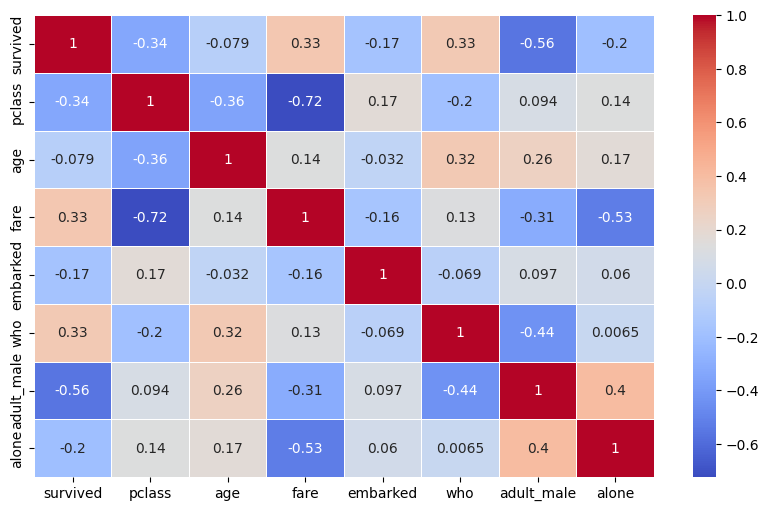

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations= df.corr()
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)


plt.show()

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X= df.drop('survived', axis=1)
Y= df['survived']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state=42)

In [11]:
df.shape

(891, 8)

# Neural Network Classifier


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 16 units
    Dropout(0.2),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid')  ])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, batch_size=30)
predicted=model.predict(X_test)
predicted = (predicted > 0.5).astype(int)
accuracy= accuracy_score(Y_test, predicted)
print('The accuracy is: ', accuracy)

C:\Users\PMLS\OneDrive - Higher Education Commission\Documents\University Work\FYP\Feasibility Study\feasibility\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6028 - loss: 0.6659
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7151 - loss: 0.6117
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7240 - loss: 0.5783
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7191 - loss: 0.5669
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.5302
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The accuracy is:  0.7430167597765364


# SVM Classifier


* For SVM, we use 2 types of kernels. Kernels are actually 

In [13]:
from sklearn.svm import SVC
svm_linear= SVC(kernel= 'linear')
svm_linear.fit(X_train, Y_train)
svml_predictions= svm_linear.predict(X_test)

In [14]:

svm_rbf= SVC(kernel= 'rbf')
svm_rbf.fit(X_train, Y_train)
svmrbf_predictions= svm_rbf.predict(X_test)

# Evaluation metrics

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Precision here
precision_svml= precision_score(Y_test, svml_predictions)
precision_svmrbf=precision_score(Y_test, svmrbf_predictions)

# Recall here
recall_svml= recall_score(Y_test, svml_predictions)
recall_svmrbf=recall_score(Y_test, svmrbf_predictions)

# F1 score here
f1score_svml= f1_score(Y_test, svml_predictions)
f1score_svmrbf=f1_score(Y_test, svmrbf_predictions)

# Roc Auc here
roc_auc_score_svml= roc_auc_score(Y_test, svml_predictions)
roc_auc_score_svmrbf=roc_auc_score(Y_test, svmrbf_predictions)


print(f"Linear Kernel- Precision: {precision_svml:.2f}, Recall: {recall_svml:.2f}, F1-Score: {f1score_svml:.2f}, ROC AUC Score: {roc_auc_score_svml:.2f}")
print(f"RBF Kernel- Precision: {precision_svmrbf:.2f}, Recall: {recall_svmrbf:.2f}, F1-Score: {f1score_svmrbf:.2f}, ROC AUC Score: {roc_auc_score_svmrbf:.2f}")



Linear Kernel- Precision: 0.74, Recall: 0.74, F1-Score: 0.74, ROC AUC Score: 0.78
RBF Kernel- Precision: 0.81, Recall: 0.68, F1-Score: 0.74, ROC AUC Score: 0.78


* As we see, both the kernels give almost the same performance in terms of accuracy and AUC metric.
* The performance of the SVM model is slightly better than the Neural network model although overall, the performance is not good as the accuracy is below 80% whereas this dataset has the potential to provide near 99% accuracy with even a slightly complex model
* The architecture of the NN has been kept simple to check its comparison with the NN created in the Naive Bayes comparison file which is also part of this repository.